In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import statsmodels.stats.weightstats as ssw
%matplotlib inline

### ЦПТ для различных распределений

In [65]:
skewnorm = sts.skewnorm(a=0.5, loc=-2)
sample = skewnorm.rvs(100)
sample

array([-0.84536645, -2.44510441, -2.69708816, -0.61665908, -2.08521785,
       -2.46086234, -2.59082858, -1.95840302, -0.4138546 , -1.23816008,
       -2.15467656, -1.62252623, -1.41295416, -3.10335404, -1.44606457,
       -2.15133507, -2.5615182 , -1.42672178, -0.82403163,  0.03247455,
       -2.42803145, -2.55527034, -1.67276371, -3.0449263 , -1.48663642,
       -1.37457145, -0.88284302, -2.19559659, -0.80091974, -1.06574847,
       -0.88252754, -0.48027634, -1.12765305, -2.73376982, -1.94428007,
       -3.13866956, -1.60674751, -2.94482161, -0.92253935, -1.6532805 ,
       -1.29424693, -1.96878215, -3.14829356, -1.3133627 , -1.08049444,
       -3.49047566,  0.44860149, -1.99065091, -2.83560983, -1.38389224,
       -1.31800426, -1.87481961, -1.66858778, -2.20720323, -1.28003722,
       -1.42802037, -3.10660424, -2.4143891 , -2.72766728, -2.45106667,
       -1.81568535, -1.06159946, -1.74821523, -1.95165878, -1.30654806,
       -2.81167719, -2.02243626, -1.9998191 , -1.82901098, -0.50

In [68]:
real_mean = skewnorm.mean()
real_mean

-1.6431751767694458

In [69]:
real_var = skewnorm.var()
real_var

0.8726760455264837

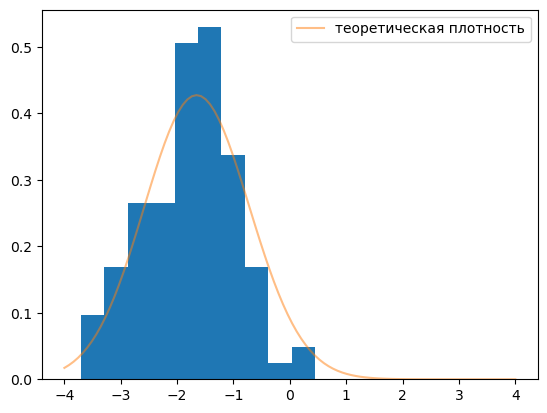

In [70]:
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = skewnorm.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [71]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-1.7693368314197726
0.7084134619085609


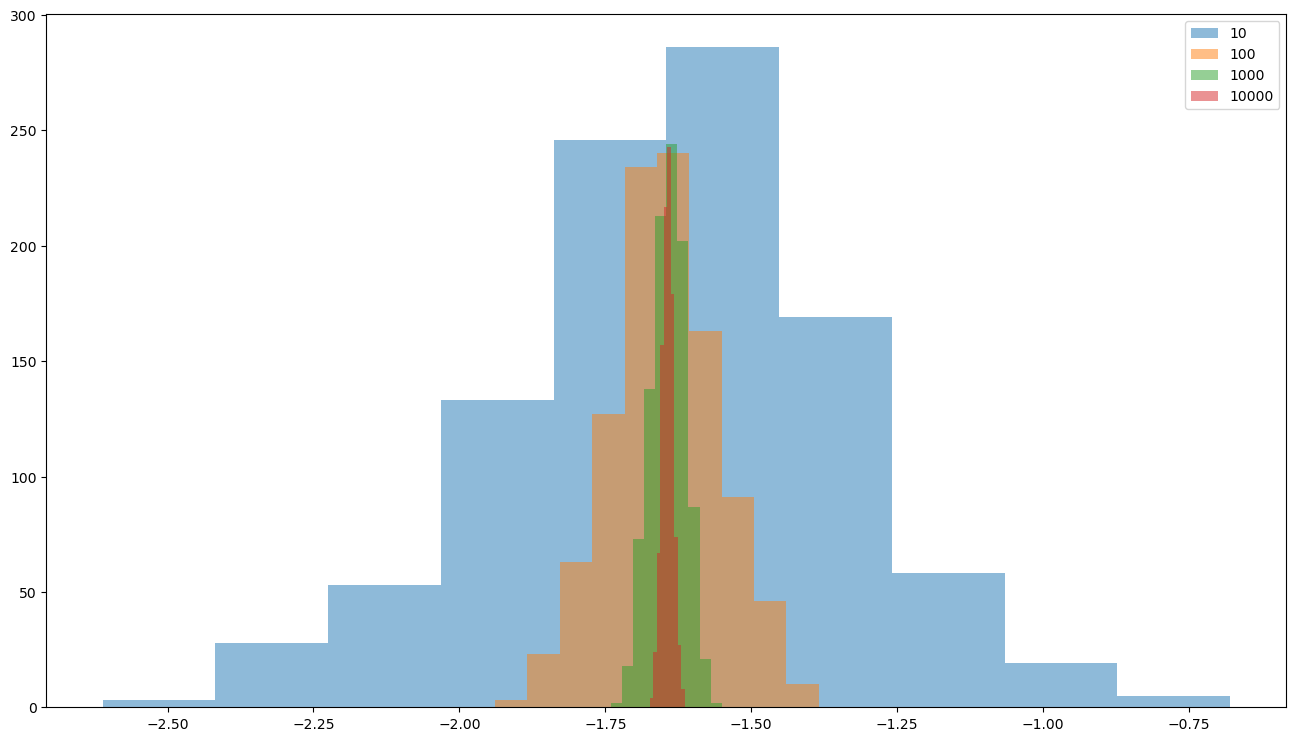

In [79]:
plt.figure(figsize=(16,9))
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(skewnorm.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

Мне пока не хватает знаний аргументированно ответить, хорошо ли работает апроксимация распределения выборочного среднего для данного распределения. Но исходя из той картины, которую мы видим на графике, явных выбросов и ассиметрии не наблюдается. Распределения в рамках каждой выборки демонстрируют в целом похожую картину.

### Доверительный интервал на основе ЦПТ

In [81]:
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [138]:
df_true = df['total day calls'].loc[df['churn'] == True]

In [140]:
df_false = df['total day calls'].loc[df['churn'] == False]

In [141]:
print("Доверительный интервал для среднего по цпт интервальная оценка при churn is True: {} ".
      format(sts.norm.interval(confidence=0.95, loc=np.mean(df_true), scale=np.std(df_true, ddof=1)/np.sqrt(N-1))))

Доверительный интервал для среднего по цпт интервальная оценка при churn is True: (100.91237712644019, 101.75843032697597) 


In [142]:
print("Доверительный интервал для среднего по цпт интервальная оценка при churn is False: {} ".
      format(sts.norm.interval(confidence=0.95, loc=np.mean(df_false), scale=np.std(df_false, ddof=1)/np.sqrt(N-1))))

Доверительный интервал для среднего по цпт интервальная оценка при churn is False: (99.8950429437265, 100.6712728457472) 


In [147]:
print("Доверительный интервал для среднего по цпт методом _zconfint_generic при churn is True: {} ".format(
    ssw._zconfint_generic(np.mean(df_true),  np.std(df_true, ddof=1), alpha=0.95, alternative='two-sided')))

Доверительный интервал для среднего по цпт методом _zconfint_generic при churn is True: (99.98204678079553, 102.68876067262063) 


In [148]:
print("Доверительный интервал для среднего по цпт методом _zconfint_generic при churn is False: {} ".format(
    ssw._zconfint_generic(np.mean(df_false),  np.std(df_false, ddof=1), alpha=0.95, alternative='two-sided')))

Доверительный интервал для среднего по цпт методом _zconfint_generic при churn is False: (99.04149114274125, 101.52482464673244) 
